<a href="https://colab.research.google.com/github/SantiagoValenciaCarmona/Se-ales/blob/main/Parcial_1_2024_21_03_Santiago_Valencia_Carmona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

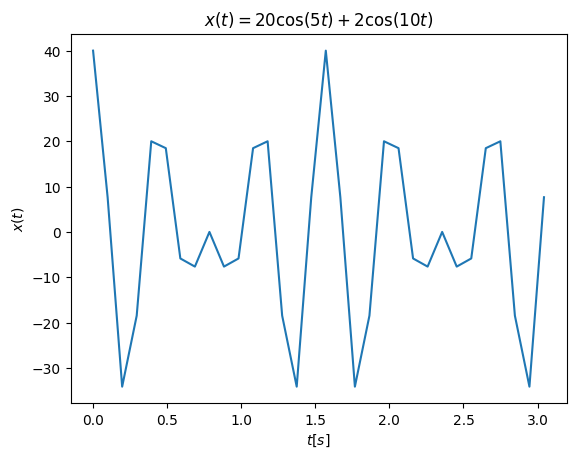

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
#Definir parámetros de la simulación

#Periodos de la señal
T1 = 1/6*np.pi
T2 = 1/8*np.pi

#Periodo señal cuasiperiodica
T = 1/2*np.pi
#Frecuencias
F1 = 1/T1
F2 = 1/T2

#Fs: frecuencia muestreo
Fs = 4* F2
Ts = 1/Fs #periodo muestreo

t = np.arange(0,2*T,Ts) #vector de tiempo que incluye dos periodos cuasiperiódica
x = 20*np.cos(2*np.pi*F1*t) + 20*np.cos(2*np.pi*F2*t)

plt.plot(t,x)
plt.xlabel('$t[s]$')
plt.ylabel('$x(t)$')
plt.title('$x(t)=20 \cos(5 t) + 2\cos(10 t)$')
plt.show()

In [9]:
#cero y pendiente
def my_ceropen(x,ymin = 0, ymax = 25): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  y = m*x + c
  return y

In [10]:
#llamdo a cero y pendiente
y =  my_ceropen(x,ymin = 0.004, ymax = 0.02)


In [11]:
from scipy.spatial.distance import cdist #función para estimar distancia punto discretizado al vector de estados
#función cuantización punto a punto
def my_cuantizador(yn, vq) : #yn punto a #cuantizar, vq vector de estados
  Ne = vq.shape[0] #tamaño vector de estados
  dn = cdist(yn.reshape(-1,1),vq.reshape(-1,1))#distancia yn a vector estados, reshape(-1,1) asegura vectores columna para poder utilizar cdist
  ind = np.argmin(dn) #posición distancia min
  return vq[ind]

In [12]:
#número de bits y vector de cuantización
nbits = 4
rmin = 0.004
rmax = 0.02
ve = np.linspace(rmin,rmax,2**nbits) # (rmax-rmin)/(2^#bits - 1) -> si se quiere incluir rmin y rmax

#recorrer vector cero y pendiente discretizado para cuantizar
for i in range(y.shape[0]):
   if i==0: #primera muestra
     yq = my_cuantizador(y[i],ve)
   else:
     yq = np.append(yq,my_cuantizador(y[i],ve)) #apilar datos cuantizando si i>0

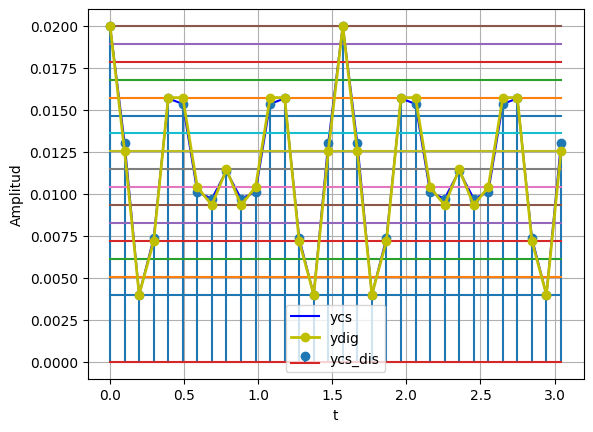

In [13]:
#graficar señales
plt.plot(t,y,c='b', label='ycs')#cs continua
plt.stem(t,y, label='ycs_dis')#cs discreta
#estados de cuantización
for v in ve:
  plt.plot(t,v*np.ones(len(t)))
# graficar señal Digital (discreta + cuantizada)

plt.plot(t,yq,c='y',marker='o',label='ydig', linewidth=2)
plt.legend()
plt.grid()
plt.xlabel('t')
plt.ylabel('Amplitud')
plt.show()

In [14]:
#crear señales
#h = np.array([1,-2,0,1,-2]).reshape(-1,1)#np.r_[np.zeros((5,1)),np.ones((5,1)),np.zeros((5,1))] # se genera un pulso rectangular
hu = np.array([2,4,1,5,0,10])
h = np.diff(hu).reshape(-1,1)
#x = np.array([-15,5,-3,0,5,7,-1]).reshape(-1,1)#signal.triang(12).reshape(-1,1) # se genera una señal triangular y se trabaja con arreglos tipo columna
#funcion convolucion
def convgraf(h,ydig): #función general para pintar proceso de convolución de forma interactiva
   lydig = len(ydig)
   lh = len(h)
   M = 2*lydig+lh # se genera un vector de tamaño completo para visualizar todo el proceso paso a paso
   xm = np.zeros((M,M))
   hm = np.r_[np.zeros((lydig,1)),h,np.zeros((lydig,1))]
   ym = np.zeros((M,M))
   for i in range(M-lydig+1):
     #print(i)
     xm[i:i+lydig,i] = np.flip(x).reshape(-1)#filp realizar el proceso de reflejo sobre arreglos discretos
     ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto
   return xm, ym, hm

def plot_conv(k,xm,ym,hm): #dibujar arreglos
     plt.stem(xm[:,k],markerfmt='+',label='$x[k]$')
     plt.stem(hm,linefmt='g',markerfmt='.',label='$h[n-k]$')
     plt.stem(ym[:k,:].sum(axis=0),markerfmt='s',linefmt='r',label='$y[n]=\sum^{\infty}_{k=-\infty}x[k]h[n-k]$')
     plt.legend()
     plt.show()
     return

xm, ym, hm = convgraf(h,x)

<ipython-input-14-13e38609c9b1>:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto
